In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('airbnb.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Essentials,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the loveliest neighborhood in Brooklyn. Blocks from the promenade and Brooklyn Bridge Park, with their stunning views of Manhattan, and from the great shopping and food.",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",7,1.0,Real Bed,strict,True,NYC,"Enjoy travelling during your stay in Manhattan. My place is centrally located near Times Square and Central Park with easy access to main subways as well as walking distance to many popular restaurants and bus tours. My place is close to the subway, Totto Ramen, Hell's Kitchen, Ippudo Westside, Empanada Mama, Intrepid Sea, Air & Space Museum. My place has three true bedrooms and one bathroom. The kitchen is stocked with stainless steel appliances like the Keurig machine. The living room is spacious and can accommodate another person thanks to the pull out bed. My place is centrally located to some of the top attractions in the city. Feel free to explore the entire apartment and do not worry about sharing the space with any strangers. This is all yours during your stay. I am available via text/email/phone for anything you might need. - Times Square - Rockefeller Plaza - Central Park - 5th Avenue Shopping -Broadway Theater District - Empire State Building - Hudson River Express Subwa",2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air conditioning"",Kitchen,Breakfast,""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_50""}",5,1.0,Real Bed,moderate,True,NYC,"The Oasis comes complete with a full backyard with outdoor furniture to make the most of this summer vacation!! The unit has high ceilings, a completed renovation throughout, beautiful flood lighting and exposed brick! Best part, total seclusion. You share with no one! The entire unit is yours during your stay. It's a fully furnished apartment that can hold up to 5 people. The only items you need are a toothbrush and your luggage!!! The unit has high ceilings, a completed renovation throughout, beautiful flood lighting and exposed brick! Not to mention the large backyard complete with ourdoor furniture. Best part, total seclusion. You share with no one! The entire unit is yours during your stay. The entire unit and backyard Garden area My assistant is available off site via phone. Other than that, you will be alone for your stay. The neighborhood of central Harlem is very diverse and full of culture! We are a few blocks from Historic 125th Street, The Apollo Theatre, The Schomburg",

In [5]:
# Removing columns which are not necessary
df = df.drop(columns=['id' , 'description' , 'name', 'thumbnail_url'])

In [6]:
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Essentials,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",3,1.0,Real Bed,strict,True,NYC,2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",7,1.0,Real Bed,strict,True,NYC,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air conditioning"",Kitchen,Breakfast,""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_50""}",5,1.0,Real Bed,moderate,True,NYC,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,""Indoor fireplace"",""Buzzer/wireless intercom"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher"",Essentials}",4,1.0,Real Bed,flexible,True,SF,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Lower Haight,0,NaN,94117.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo}",2,1.0,Real Bed,moderate,True,DC,2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0


In [7]:
df.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [8]:
def count_amenities(amenities_str):
    
    amenities_str = amenities_str.strip('{}')
   
    amenities_str = re.sub(r'"translation missing: en.hosting_[^"]+"', '', amenities_str)
   
    amenities_list = re.split(r',(?=(?:[^"]*"[^"]*")*[^"]*$)', amenities_str)
   
    filtered_amenities = [amenity.strip().strip('"') for amenity in amenities_list if amenity.strip()]
   
    return len(filtered_amenities)


df['num_amenities'] = df['amenities'].apply(count_amenities)

In [9]:
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,num_amenities
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Essentials,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",3,1.0,Real Bed,strict,True,NYC,2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Brooklyn Heights,2,100.0,11201,1.0,1.0,8
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",7,1.0,Real Bed,strict,True,NYC,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,14
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air conditioning"",Kitchen,Breakfast,""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_50""}",5,1.0,Real Bed,moderate,True,NYC,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0,18
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,""Indoor fireplace"",""Buzzer/wireless intercom"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher"",Essentials}",4,1.0,Real Bed,flexible,True,SF,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Lower Haight,0,NaN,94117.0,2.0,2.0,15
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo}",2,1.0,Real Bed,moderate,True,DC,2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0,12


In [10]:
top_cities = df['city'].value_counts().nlargest(5).index

In [11]:
# Determine the top 5 property types by number of listings
top_property_types = df['property_type'].value_counts().nlargest(5).index

In [12]:
# Filter the dataset to include only top cities and property types
filtered_df = df[df['city'].isin(top_cities) & df['property_type'].isin(top_property_types)]

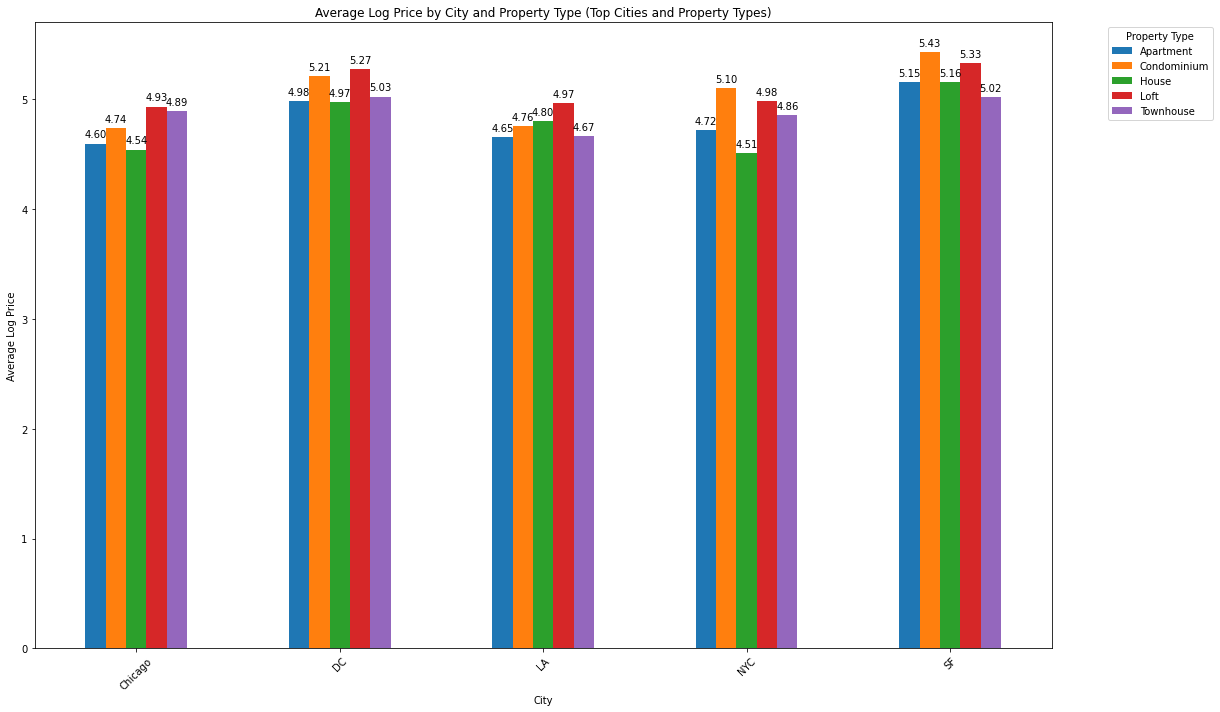

In [13]:
average_log_price = filtered_df.groupby(['city', 'property_type'])['log_price'].mean().reset_index()


average_log_price_pivot = average_log_price.pivot(index='city', columns='property_type', values='log_price')


ax = average_log_price_pivot.plot(kind='bar', figsize=(17, 10), legend=True)
plt.title('Average Log Price by City and Property Type (Top Cities and Property Types)')
plt.xlabel('City')
plt.ylabel('Average Log Price')
plt.xticks(rotation=45)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [14]:
# Filter out listings without review scores
filtered_df_2 = df[df['review_scores_rating'].notnull()]

In [15]:
room_type_stats = filtered_df_2.groupby('room_type')['review_scores_rating'].describe()

In [16]:
print(room_type_stats)

                   count       mean        std   min   25%   50%    75%    max
room_type                                                                     
Entire home/apt  33017.0  94.303026   7.188182  20.0  92.0  96.0  100.0  100.0
Private room     22929.0  93.866196   8.485301  20.0  92.0  96.0  100.0  100.0
Shared room       1443.0  91.871795  10.461384  20.0  89.0  95.0  100.0  100.0


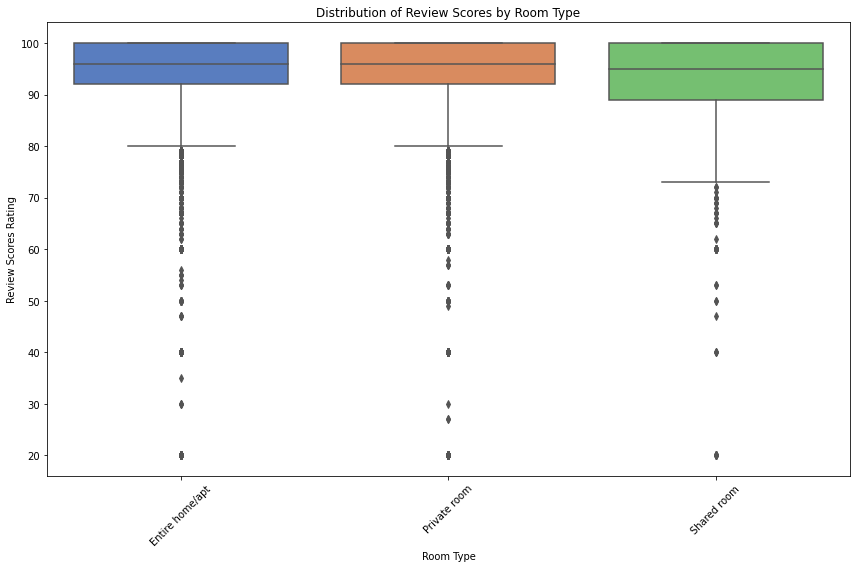

In [17]:
# Plotting the distribution of review scores by room type using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='review_scores_rating', data=filtered_df_2, palette='muted')
plt.title('Distribution of Review Scores by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Review Scores Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Filter the dataset to include only top cities, property types, and non-null review scores
filtered_df_3 = df[df['city'].isin(top_cities) & 
                 df['property_type'].isin(top_property_types) & 
                 ~df['review_scores_rating'].isnull()]

# Group by city and calculate statistics for review scores
city_ratings_stats = filtered_df.groupby('city')['review_scores_rating'].describe()


In [19]:
print(city_ratings_stats)

           count       mean       std   min   25%   50%    75%    max
city                                                                 
Chicago   3138.0  95.130975  5.950898  20.0  93.0  97.0  100.0  100.0
DC        3981.0  94.864104  7.276925  20.0  93.0  97.0  100.0  100.0
LA       15816.0  94.266313  7.861456  20.0  92.0  96.0  100.0  100.0
NYC      24661.0  93.526621  8.167830  20.0  91.0  96.0  100.0  100.0
SF        4760.0  95.148739  6.712145  20.0  93.0  97.0  100.0  100.0


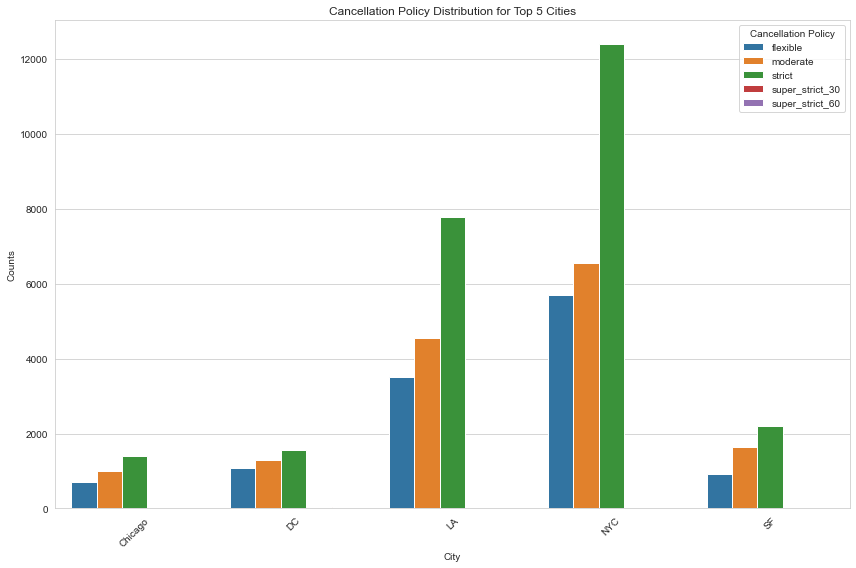

In [20]:
filtered_df_4 = df[df['city'].isin(top_cities)]

cancellation_policy_distribution = filtered_df_3.groupby(['city', 'cancellation_policy']).size().reset_index(name='counts')

sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(data=cancellation_policy_distribution, x='city', y='counts', hue='cancellation_policy')
plt.title('Cancellation Policy Distribution for Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Counts')
plt.xticks(rotation=45)  
plt.legend(title='Cancellation Policy')
plt.tight_layout()  
plt.show()

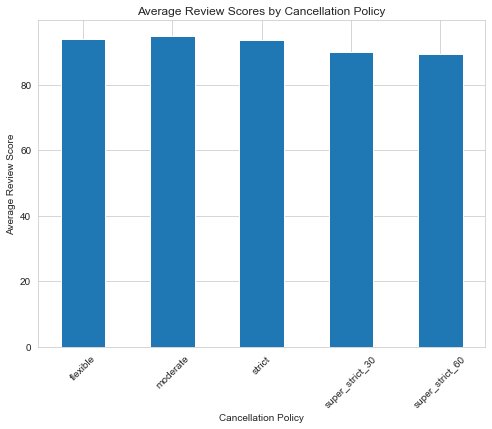

In [21]:
# Calculate average review scores for each cancellation policy type
average_review_scores = filtered_df_2.groupby('cancellation_policy')['review_scores_rating'].mean()

plt.figure(figsize=(8, 6))
average_review_scores.plot(kind='bar')
plt.title('Average Review Scores by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Filter the dataset to include only top cities and property types
filtered_df_5 = df[df['city'].isin(top_cities)]

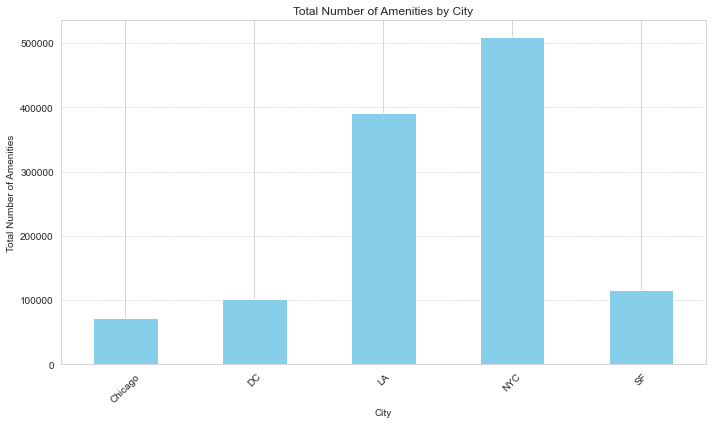

In [23]:
city_amenities_sum = filtered_df_5.groupby('city')['num_amenities'].sum()
plt.figure(figsize=(10, 6))
city_amenities_sum.plot(kind='bar', color='skyblue')
plt.title('Total Number of Amenities by City')
plt.xlabel('City')
plt.ylabel('Total Number of Amenities')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

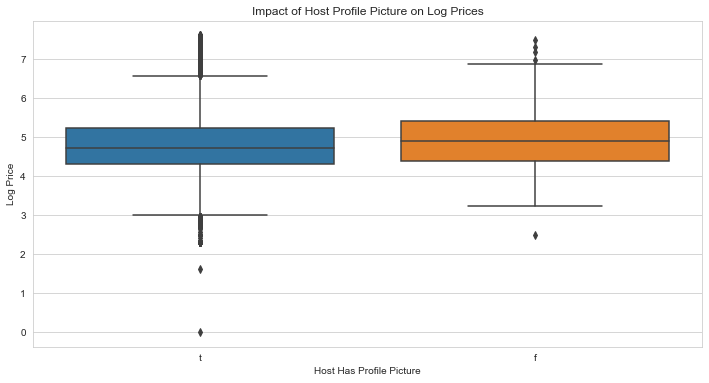

In [24]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='host_has_profile_pic', y='log_price', data=df)
plt.title('Impact of Host Profile Picture on Log Prices')
plt.xlabel('Host Has Profile Picture')
plt.ylabel('Log Price')
plt.show()

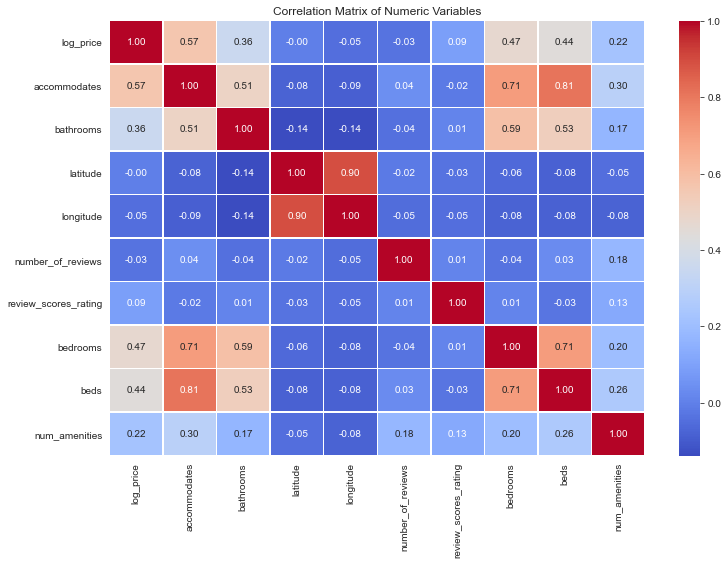

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


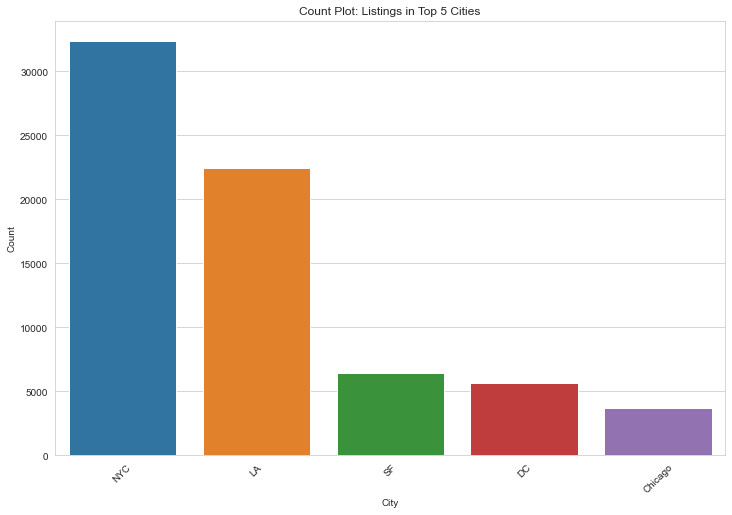

In [26]:
top_cities = df['city'].value_counts().nlargest(5).index
df_top_cities = df[df['city'].isin(top_cities)]

plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_cities, x='city', order=top_cities)
plt.title('Count Plot: Listings in Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

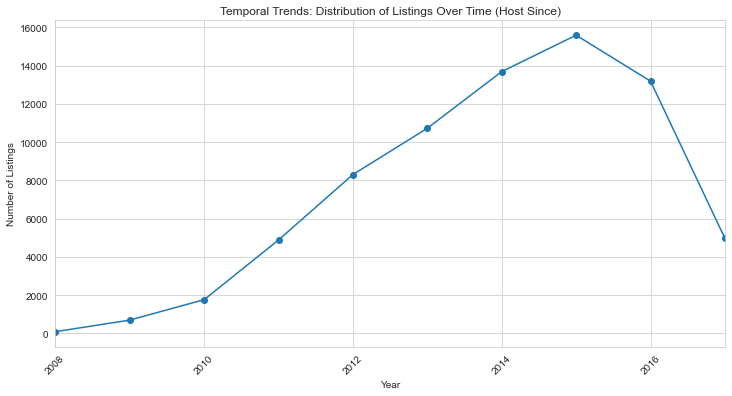

In [27]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])

# Temporal Trends Analysis: Distribution of listings over time
plt.figure(figsize=(12, 6))
df['host_since_year'] = df['host_since'].dt.to_period('Y')
host_since_counts = df['host_since_year'].value_counts().sort_index()
host_since_counts.plot(kind='line', marker='o')
plt.title('Temporal Trends: Distribution of Listings Over Time (Host Since)')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [28]:
# Calculate the growth rate year by year for host registrations
host_registrations_growth_rate = host_since_counts.pct_change() * 100

In [29]:
print(host_registrations_growth_rate)

host_since_year
2008           NaN
2009    667.032967
2010    153.008596
2011    176.727067
2012     70.002046
2013     29.140587
2014     27.598099
2015     13.907962
2016    -15.416186
2017    -62.319939
Freq: A-DEC, Name: count, dtype: float64


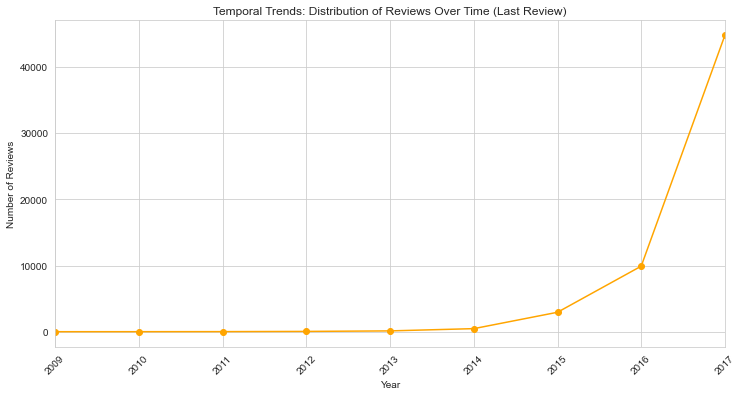

In [30]:
# Temporal Trends Analysis: Distribution of reviews over time
plt.figure(figsize=(12, 6))
df['last_review_year'] = df['last_review'].dt.to_period('Y')  
last_review_counts = df['last_review_year'].value_counts().sort_index()
last_review_counts.plot(kind='line', marker='o', color='orange')
plt.title('Temporal Trends: Distribution of Reviews Over Time (Last Review)')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [31]:
# Calculate the growth rate year by year for host registrations
review_growth_rate = last_review_counts.pct_change() * 100

In [32]:
print(review_growth_rate)

last_review_year
2009           NaN
2010    150.000000
2011    180.000000
2012    221.428571
2013    175.555556
2014    275.000000
2015    531.827957
2016    237.100068
2017    352.211228
Freq: A-DEC, Name: count, dtype: float64


In [33]:
# Time-to-Event Analysis: Calculate time difference between host_since and last_review
df['time_since_registration'] = (pd.to_datetime('now') - df['host_since']).dt.days
df['time_since_last_review'] = (pd.to_datetime('now') - df['last_review']).dt.days

# Display summary statistics for time since registration and last review
print("Summary Statistics for Time Since Registration:")
print(df['time_since_registration'].describe())
print("\nSummary Statistics for Time Since Last Review:")
print(df['time_since_last_review'].describe())


Summary Statistics for Time Since Registration:
count    73923.000000
mean      3594.920025
std        661.497132
min       2424.000000
25%       3076.000000
50%       3526.000000
75%       4051.000000
max       5926.000000
Name: time_since_registration, dtype: float64

Summary Statistics for Time Since Last Review:
count    58284.000000
mean      2627.189366
std        231.729791
min       2423.000000
25%       2450.000000
50%       2583.000000
75%       2692.000000
max       5602.000000
Name: time_since_last_review, dtype: float64


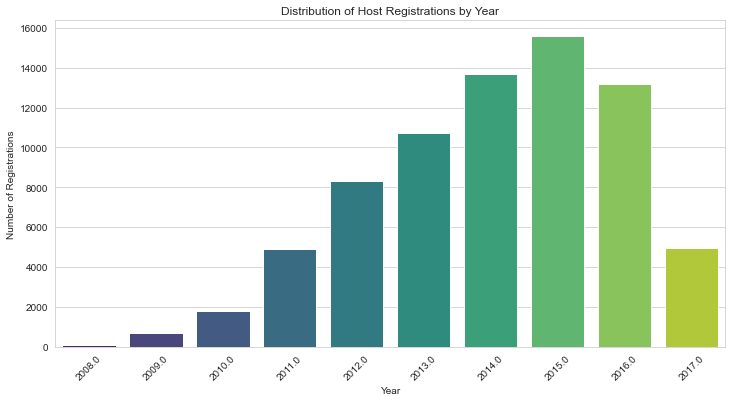

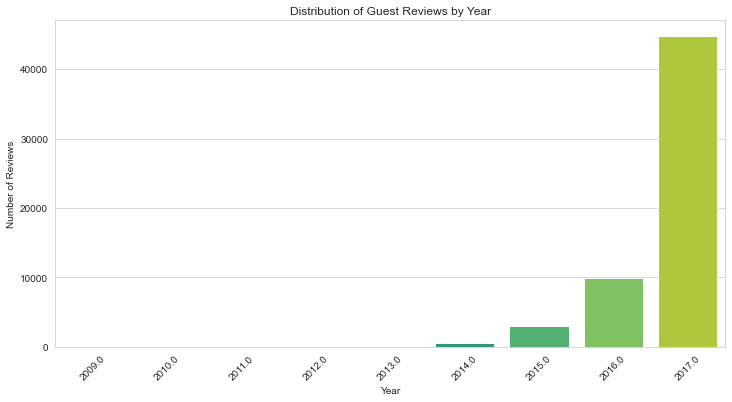

In [34]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])

df['host_registration_year'] = df['host_since'].dt.year
df['review_year'] = df['last_review'].dt.year

# Plot the distribution of host registrations by year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='host_registration_year', palette='viridis')
plt.title('Distribution of Host Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of guest reviews by year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='review_year', palette='viridis')
plt.title('Distribution of Guest Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Calculate the number of registrations and reviews by year
host_registrations_by_year = df['host_registration_year'].value_counts().sort_index()
guest_reviews_by_year = df['review_year'].value_counts().sort_index()

# Calculate the growth rate year by year for host registrations
host_registrations_growth_rate = host_registrations_by_year.pct_change() * 100

# Calculate the growth rate year by year for guest reviews
guest_reviews_growth_rate = guest_reviews_by_year.pct_change() * 100

print("Yearly Growth Rate of Host Registrations:")
print(host_registrations_growth_rate)

print("\nYearly Growth Rate of Guest Reviews:")
print(guest_reviews_growth_rate)


Yearly Growth Rate of Host Registrations:
host_registration_year
2008.0           NaN
2009.0    667.032967
2010.0    153.008596
2011.0    176.727067
2012.0     70.002046
2013.0     29.140587
2014.0     27.598099
2015.0     13.907962
2016.0    -15.416186
2017.0    -62.319939
Name: count, dtype: float64

Yearly Growth Rate of Guest Reviews:
review_year
2009.0           NaN
2010.0    150.000000
2011.0    180.000000
2012.0    221.428571
2013.0    175.555556
2014.0    275.000000
2015.0    531.827957
2016.0    237.100068
2017.0    352.211228
Name: count, dtype: float64


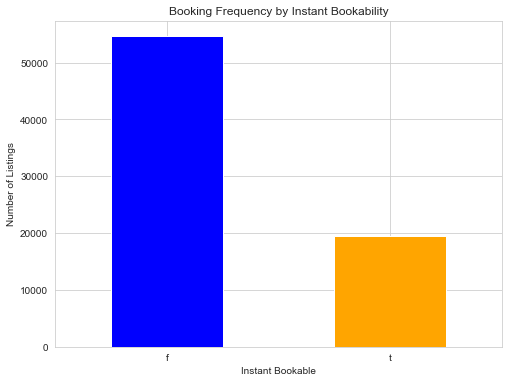

In [36]:
booking_frequency = df['instant_bookable'].value_counts()

plt.figure(figsize=(8, 6))
booking_frequency.plot(kind='bar', color=['blue', 'orange'])
plt.title('Booking Frequency by Instant Bookability')
plt.xlabel('Instant Bookable')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.show()

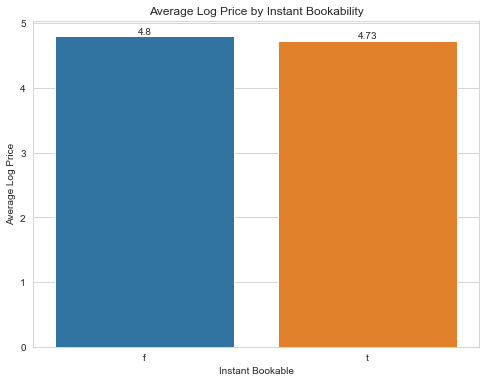

In [37]:
# Calculate average log price for instant bookable and non-instant bookable listings
avg_price_by_instant_bookable = df.groupby('instant_bookable')['log_price'].mean()

# Plotting the average log price for instant bookable and non-instant bookable listings
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_instant_bookable.index, y=avg_price_by_instant_bookable.values)
plt.title('Average Log Price by Instant Bookability')
plt.xlabel('Instant Bookable')
plt.ylabel('Average Log Price')
plt.xticks(rotation=0)

for i, value in enumerate(avg_price_by_instant_bookable.values):
    plt.text(i, value, round(value, 2), ha='center', va='bottom')

plt.show()


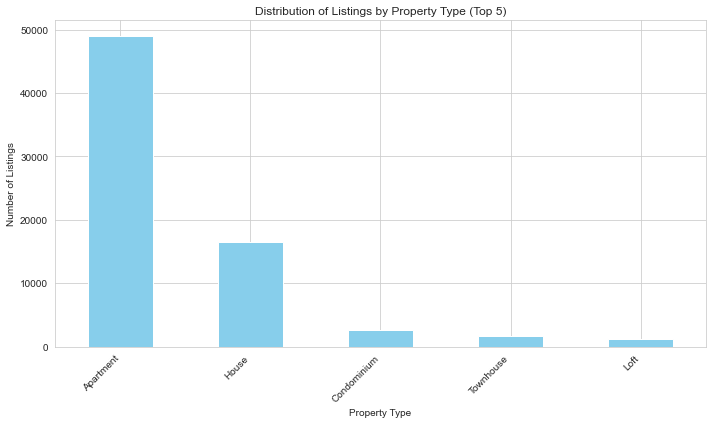

In [38]:
top_n = 5
top_property_types = df['property_type'].value_counts().nlargest(top_n).index


df_top_property_types = df[df['property_type'].isin(top_property_types)]

# Calculate the distribution of listings by property type for the top 5 property types
property_distribution = df_top_property_types['property_type'].value_counts()

# Plot the distribution of listings by property type for the top 5 property types
plt.figure(figsize=(10, 6))
property_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Listings by Property Type (Top 5)')
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

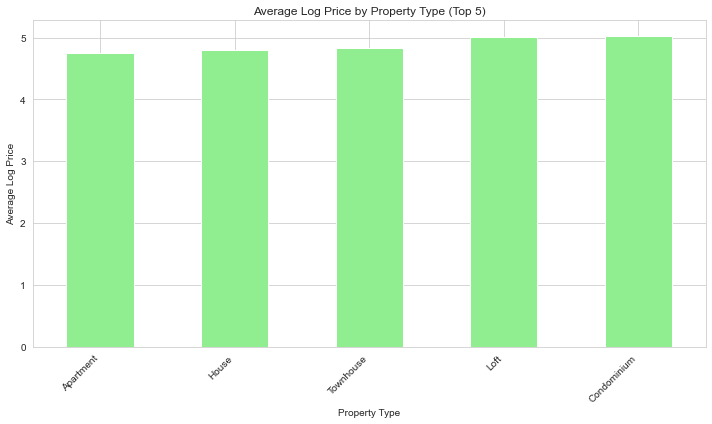

In [39]:
avg_log_price_by_property_type = df_top_property_types.groupby('property_type')['log_price'].mean().sort_values()

# Plot the average log price by property type for the top 5 property types
plt.figure(figsize=(10, 6))
avg_log_price_by_property_type.plot(kind='bar', color='lightgreen')
plt.title('Average Log Price by Property Type (Top 5)')
plt.xlabel('Property Type')
plt.ylabel('Average Log Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

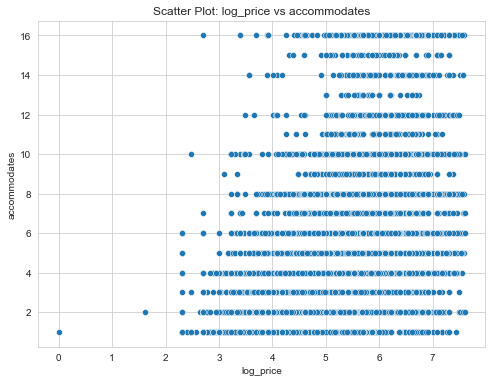

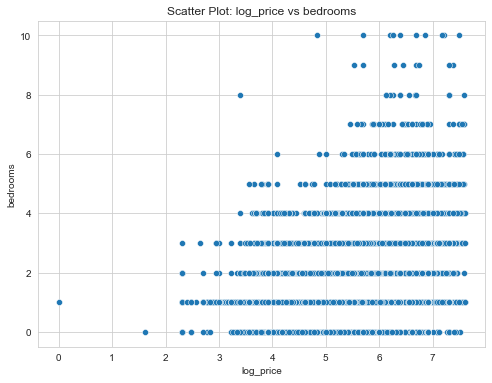

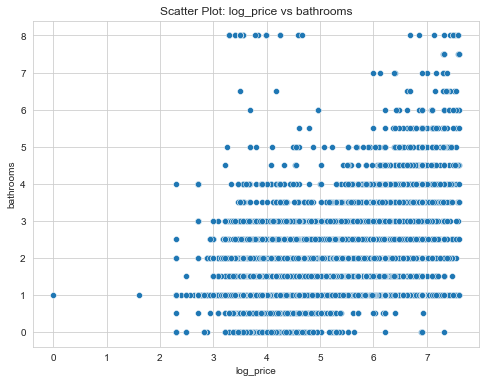

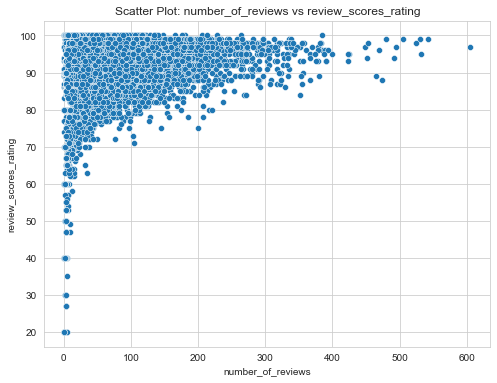

In [40]:
# Define the specific pairs of numeric variables of interest
specific_pairs = [('log_price', 'accommodates'),
                  ('log_price', 'bedrooms'),
                  ('log_price', 'bathrooms'),
                  ('number_of_reviews', 'review_scores_rating')]

# Create scatter plots for specific pairs of variables
for pair in specific_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=pair[0], y=pair[1])
    plt.title(f'Scatter Plot: {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

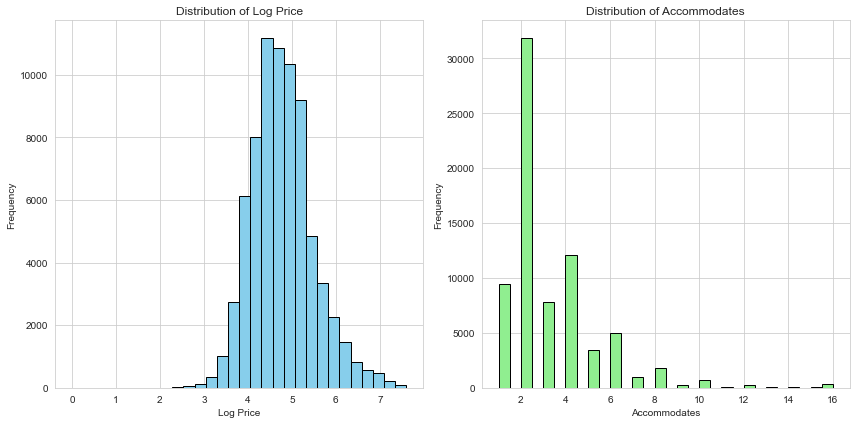

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Distribution plot for log_price
axes[0].hist(df['log_price'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Log Price')
axes[0].set_xlabel('Log Price')
axes[0].set_ylabel('Frequency')

# Distribution plot for accommodates
axes[1].hist(df['accommodates'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Accommodates')
axes[1].set_xlabel('Accommodates')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()